<a href="https://colab.research.google.com/github/softwarerbfl/imageProcessing/blob/main/Notebook-Week10/2022_2_ImgProc_MO4_CH6_Histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/gdrive')
%cd /gdrive/My\ Drive/Colab\ Notebooks/2022_영상정보처리/Notebook-Week\ 10
from google.colab.patches import cv2_imshow
import matplotlib.cm as cm
import numpy as np

Mounted at /gdrive
/gdrive/My Drive/Colab Notebooks/2022_영상정보처리/Notebook-Week 10


In [ ]:
# cd to your working directory
%ls ..

 2022-1-Midterm-SampleImages/  'Notebook-Week 2'/  'Notebook-Week 6'/
 Dongkeun-OpenCV-ImgData/      'Notebook-Week 3'/  'Notebook-Week 7'/
 Midterm/                      'Notebook-Week 4'/  'Notebook-Week 9'/
'Notebook-Week 10'/            'Notebook-Week 5'/


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# matplot color display
def show_with_matplotlib_jh(img, title):
    if img is None:
      print("show_with_matplotlib: Could not read the image.")
      return

    if img.shape[2] != 3:
      print()
      print("show_with_matplotlib: given image does not contains 3 channels")
      return

    # Convert BGR image to RGB:
    img_RGB = img[:, :, ::-1]

    # Show the image using matplotlib:
    plt.imshow(img_RGB)
    plt.title(title)
    plt.show()

# matplot grayscale display
def show_with_matplotlib_gray_jh(img, title):
   if img is None:
      print("show_with_matplotlib_gray: Could not read the image.")
      return

   if img.ndim > 2:
      print()
      print("show_with_matplotlib: given image has more than 2 dim")
      return
      
   plt.imshow(img, cmap="gray")
   plt.title(title)
   plt.show()

def show_with_matplotlib_MO4(color_img, title, pos, axis_show):
    # Convert BGR image to RGB
    img_RGB = color_img[:, :, ::-1]

    ax = plt.subplot(3, 6, pos)
    plt.imshow(img_RGB)
    plt.title(title)

    if not axis_show:
      plt.axis('off')

    plt.show()

### Chapter 6: Constructing and building histograms

### Source Code: histogram_introduction.py

In [ ]:
def build_sample_image():
    """Builds a sample image with 50x50 regions of different tones of gray"""

    # Define the different tones. In this case: 60, 90, 120, ..., 210
    # The end of interval (240) is not included
    tones = np.arange(start=60, stop=240, step=30)

    # Initialize result withe the first 50x50 region with 30-intensity level
    result = np.ones((50, 50, 3), dtype="uint8") * 30

    # Build the image concatenating horizontally the regions:
    for tone in tones:
        img = np.ones((50, 50, 3), dtype="uint8") * tone
        result = np.concatenate((result, img), axis=1)

    return result

def build_sample_image_2():
    """Builds a sample image with 50x50 regions of different tones of gray
    flipping the output of build_sample_image()
    """

    # Flip the image in the left/right direction:
    img = np.fliplr(build_sample_image())
    return img


def show_img_with_matplotlib(color_img, title, pos):
    """Shows an image using matplotlib capabilities"""

    # Convert BGR image to RGB
    img_RGB = color_img[:, :, ::-1]

    ax = plt.subplot(2, 2, pos)
    plt.imshow(img_RGB)
    plt.title(title)
    plt.axis('off')


def show_hist_with_matplotlib_gray(hist, title, pos, color):
    """Shows the histogram using matplotlib capabilities"""

    ax = plt.subplot(2, 2, pos)
    plt.title(title)
    plt.xlabel("bins")
    plt.ylabel("number of pixels")
    plt.xlim([0, 256])
    plt.plot(hist, color=color)

def show_hist_with_matplotlib_jh(hist, title, bno):
  plt.title(title)
  
  # make a x-axis values
  binX = np.arange(bno)
  plt.bar(binX, hist, width=1, color='b')
  plt.show()

Source Code: histogram_introduction.py

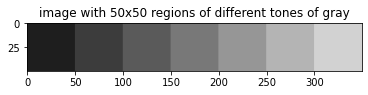

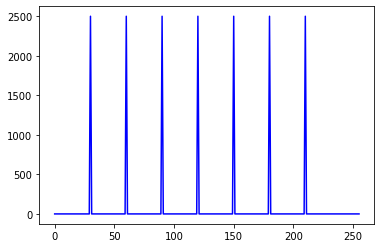

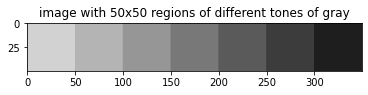

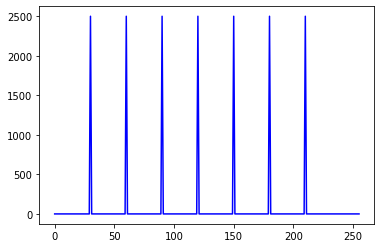

In [ ]:


# Load the image and convert it to grayscale:
image = build_sample_image()
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Load the second image and convert it to grayscale:
image_2 = build_sample_image_2()
gray_image_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2GRAY)

# Calculate the histogram calling cv2.calcHist()
# The first argument it the list of images to process
# The second argument is the indexes of the channels to be used to calculate the histogram
# The third argument is a mask to compute the histogram
# The fourth argument is a list containing the number of bins for each channel
# The fifth argument is the range of possible pixel values
hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
hist_2 = cv2.calcHist([gray_image_2], [0], None, [256], [0, 256])

# Plot the grayscale images and the histograms:
show_with_matplotlib_jh(cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR),
                         "image with 50x50 regions of different tones of gray")
plt.plot(hist, 'b')    
# Show the Figure:
plt.show()

show_with_matplotlib_jh(cv2.cvtColor(gray_image_2, cv2.COLOR_GRAY2BGR), "image with 50x50 regions of different tones of gray")
plt.plot(hist_2, 'b') 
# Show the Figure:
plt.show()

Source Code: grayscale_histogram.py

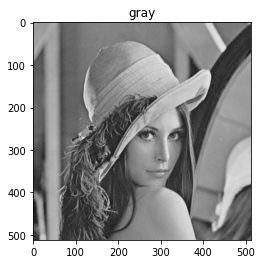

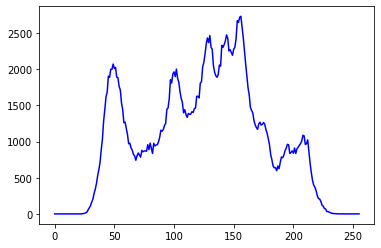

In [ ]:
# Load the image and convert it to grayscale:
image_path = '../Dongkeun-OpenCV-ImgData/Lena.png'
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Calculate the histogram calling cv2.calcHist()
# The first argument it the list of images to process
# The second argument is the indexes of the channels to be used to calculate the histogram
# The third argument is a mask to compute the histogram for the masked pixels
# The fourth argument is a list containing the number of bins for each channel
# The fifth argument is the range of possible pixel values
hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

# Plot the grayscale image and the histogram:
#show_img_with_matplotlib(cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR), "gray", 1)
# show_hist_with_matplotlib_gray(hist, "grayscale histogram", 4, 'm')

# Plot the grayscale images and the histograms:
show_with_matplotlib_jh(cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR), "gray")
plt.plot(hist, 'b')    
# Show the Figure:
plt.show()


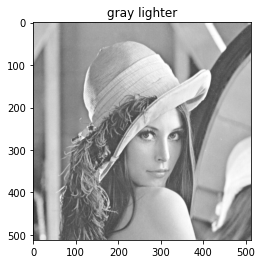

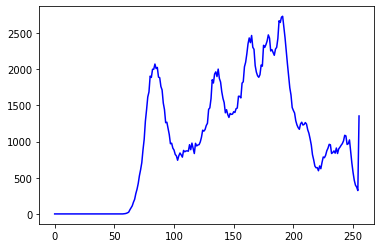

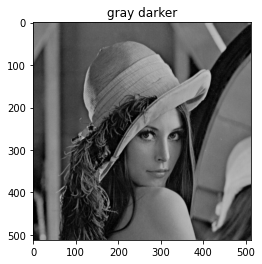

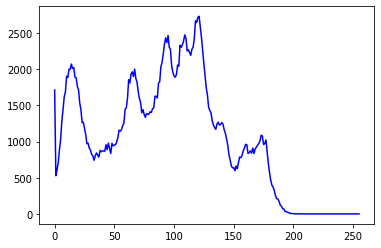

In [ ]:
# Add 35 to every pixel on the grayscale image (the result will look lighter) and calculate histogram
M = np.ones(gray_image.shape, dtype="uint8") * 35
added_image = cv2.add(gray_image, M)
hist_added_image = cv2.calcHist([added_image], [0], None, [256], [0, 256])

# Subtract 35 from every pixel (the result will look darker) and calculate histogram
subtracted_image = cv2.subtract(gray_image, M)
hist_subtracted_image = cv2.calcHist([subtracted_image], [0], None, [256], [0, 256])

# Write these images to disk to be used for histogram comparison (see exercise 'compare_histogram.py')

# Plot the images and the histograms:
#show_img_with_matplotlib(cv2.cvtColor(added_image, cv2.COLOR_GRAY2BGR), "gray lighter", 2)
#show_hist_with_matplotlib_gray(hist_added_image, "grayscale histogram", 5, 'm')
#show_img_with_matplotlib(cv2.cvtColor(subtracted_image, cv2.COLOR_GRAY2BGR), "gray darker", 3)
#show_hist_with_matplotlib_gray(hist_subtracted_image, "grayscale histogram", 6, 'm')
show_with_matplotlib_jh(cv2.cvtColor(added_image, cv2.COLOR_GRAY2BGR),"gray lighter")
plt.plot(hist_added_image, 'b')  
plt.show()

show_with_matplotlib_jh(cv2.cvtColor(subtracted_image, cv2.COLOR_GRAY2BGR),"gray darker")
plt.plot(hist_subtracted_image, 'b')  
plt.show()

Source Code: grayscale_histogram_mask.py

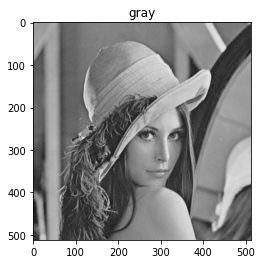

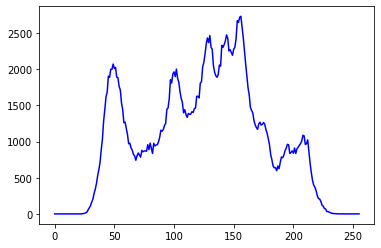

In [ ]:
# Load the image and convert it to grayscale:
image_path = '../Dongkeun-OpenCV-ImgData/Lena.png'
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Calculate the histogram calling cv2.calcHist()
# The first argument it the list of images to process
# The second argument is the indexes of the channels to be used to calculate the histogram
# The third argument is a mask to compute the histogram for the masked pixels
# The fourth argument is a list containing the number of bins for each channel
# The fifth argument is the range of possible pixel values
hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

# Plot the grayscale image and the histogram:
##show_img_with_matplotlib(cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR), "gray", 1)
##show_hist_with_matplotlib_gray(hist, "grayscale histogram", 2, 'm')
show_with_matplotlib_jh(cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR),"gray")
plt.plot(hist, 'b')  
plt.show()

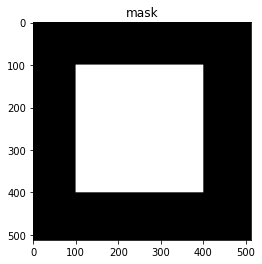

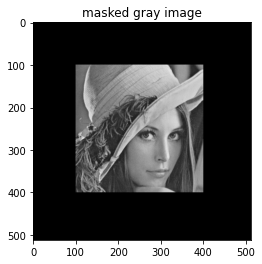

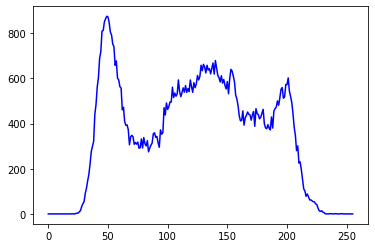

In [ ]:
# Create the mask and calculate the histogram using the mask:
mask = np.zeros(gray_image.shape[:2], np.uint8)
mask[100:400, 100:400] = 255
hist_mask = cv2.calcHist([gray_image], [0], mask, [256], [0, 256])
show_with_matplotlib_jh(cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR),"mask")

# Create the 'masked_img' (only for visualization) and show the grayscale masked histogram:
masked_img = cv2.bitwise_and(gray_image, gray_image, mask=mask)
#show_img_with_matplotlib(cv2.cvtColor(masked_img, cv2.COLOR_GRAY2BGR), "masked gray image", 3)
#show_hist_with_matplotlib_gray(hist_mask, "grayscale masked histogram", 4, 'm')
show_with_matplotlib_jh(cv2.cvtColor(masked_img, cv2.COLOR_GRAY2BGR),"masked gray image")
plt.plot(hist_mask, 'b')  
plt.show()


Source Code:color_histogram.py

In [ ]:
def hist_color_img(img):
    """Calculates the histogram for a three-channel image"""

    histr = []
    histr.append(cv2.calcHist([img], [0], None, [256], [0, 256]))
    histr.append(cv2.calcHist([img], [1], None, [256], [0, 256]))
    histr.append(cv2.calcHist([img], [2], None, [256], [0, 256]))
    return histr

def show_hist_with_matplotlib_rgb_jh(hist, title, color):
    """Shows the histogram using matplotlib capabilities"""

    # plt.title(title)
    plt.xlabel("bins")
    plt.ylabel("number of pixels")
    plt.xlim([0, 256])

    for (h, c) in zip(hist, color): # zip aggregates the data with the same cardinality
        plt.plot(h, color=c)

    plt.show()
    

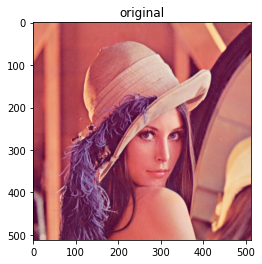

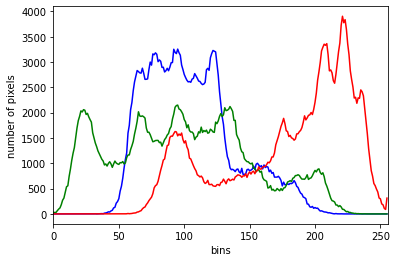

In [ ]:
# Load the original image:
image_path = '../Dongkeun-OpenCV-ImgData/Lena.png'
image = cv2.imread(image_path)

# Calculate the histogram for this BGR image:
hist_color = hist_color_img(image)

# Show the BGR image:
show_with_matplotlib_jh(image,"original")

# Show the created histogram:
show_hist_with_matplotlib_rgb_jh(hist_color, "color histogram", ['b', 'g', 'r'])

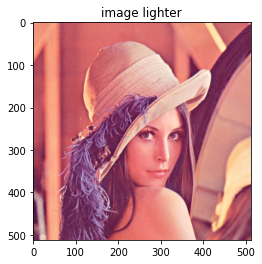

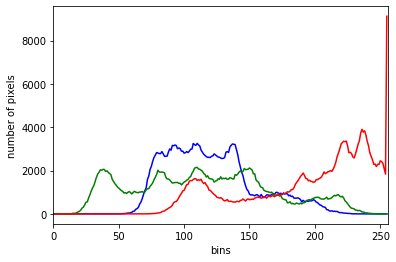

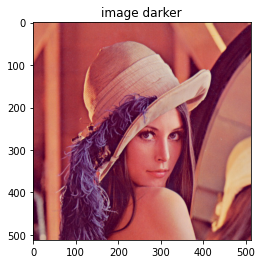

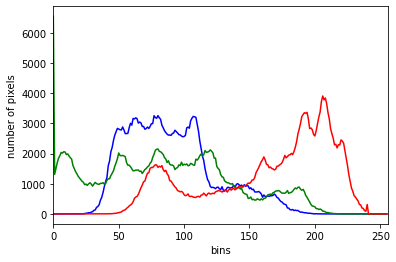

In [ ]:
# Add 15 to every pixel on the grayscale image (the result will look lighter) and calculate histogram:
M = np.ones(image.shape, dtype="uint8") * 15
added_image = cv2.add(image, M) #이미지 밝게 만들어주기 
hist_color_added_image = hist_color_img(added_image)

# Subtract 15 from every pixel (the result will look darker) and calculate histogram:
subtracted_image = cv2.subtract(image, M) #이미지 어둡게 만들어주기 
hist_color_subtracted_image = hist_color_img(subtracted_image)

# Plot the images and the histograms:
#show_img_with_matplotlib(added_image, "image lighter", 2)
# show_hist_with_matplotlib_rgb(hist_color_added_image, "color histogram", 5, ['b', 'g', 'r'])
show_with_matplotlib_jh(added_image,"image lighter")
show_hist_with_matplotlib_rgb_jh(hist_color_added_image, "color histogram", ['b', 'g', 'r'])

#show_img_with_matplotlib(subtracted_image, "image darker", 3)
#show_hist_with_matplotlib_rgb(hist_color_subtracted_image, "color histogram", 6, ['b', 'g', 'r'])
show_with_matplotlib_jh(subtracted_image,"image darker")
show_hist_with_matplotlib_rgb_jh(hist_color_subtracted_image, "color histogram", ['b', 'g', 'r'])


Source Code: histogram_custom_visualization.py

In [ ]:
def plot_hist(hist_items, color):
    """Plots the histogram of a image"""

    # For visualization purposes we add some offset:
    offset_down = 10
    offset_up = 10
    # This will be used for creating the points to visualize (x-coordinates):
    x_values = np.arange(256).reshape(256, 1)
    # Create the canvas where the histogram will be plotted:
    canvas = np.ones((300, 256, 3), dtype="uint8") * 255

    for hist_item, col in zip(hist_items, color):
        # Normalize in the range for proper visualization:
        cv2.normalize(hist_item, hist_item, 0 + offset_down, 300 - offset_up, cv2.NORM_MINMAX)
        # Round the normalized values of the histogram:
        around = np.around(hist_item)
        # Cast the values to int:
        hist = np.int32(around)
        # Create the points using the histogram and the x-coordinates:
        pts = np.column_stack((x_values, hist))
        # Draw the points:
        cv2.polylines(canvas, [pts], False, col, 2)
        # Draw a rectangle:
        cv2.rectangle(canvas, (0, 0), (255, 298), (0, 0, 0), 1)

    # Flip the image in the up/down direction:
    res = np.flipud(canvas)
    return res

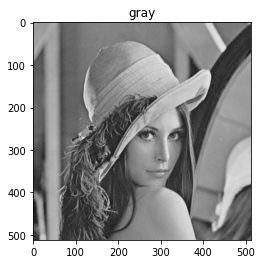

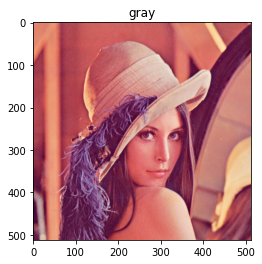

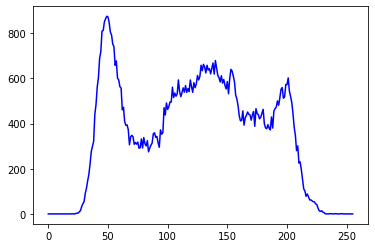

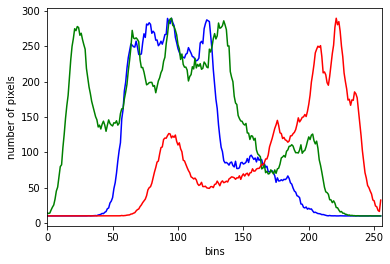

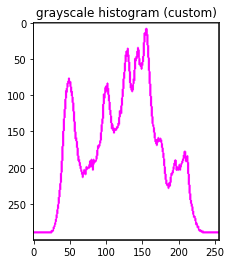

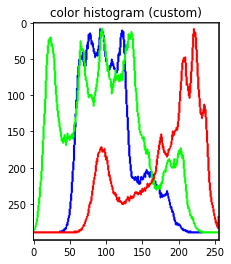

In [ ]:
# Load the image and convert it to grayscale:
image_path = '../Dongkeun-OpenCV-ImgData/Lena.png'
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Calculate the histogram calling cv2.calcHist()
hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

# Calculate the histogram for this BGR image:
hist_color = hist_color_img(image)

# Get the custom visualization for the grayscale histogram:
gray_plot = plot_hist([hist], [(255, 0, 255)])

# Get the custom visualization for the color histogram:
color_plot = plot_hist(hist_color, [(255, 0, 0), (0, 255, 0), (0, 0, 255)])

# Plot all the figures:
# show_img_with_matplotlib(cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR), "gray", 1)
# show_img_with_matplotlib(image, "image", 4)
show_with_matplotlib_jh(cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR),"gray")
show_with_matplotlib_jh(image,"gray")

# show_hist_with_matplotlib_gray(hist, "grayscale histogram (matplotlib)", 2, 'm')
# show_hist_with_matplotlib_rgb(hist_color, "color histogram (matplotlib)", 3, ['b', 'g', 'r'])
plt.plot(hist_mask, 'b')  
plt.show()
show_hist_with_matplotlib_rgb_jh(hist_color, "color histogram(matplotlib)", ['b', 'g', 'r'])

# show_img_with_matplotlib(gray_plot, "grayscale histogram (custom)", 5)
# show_img_with_matplotlib(color_plot, "color histogram (custom)", 6)
show_with_matplotlib_jh(gray_plot,"grayscale histogram (custom)")
show_with_matplotlib_jh(color_plot,"color histogram (custom)")
